1.   What proportion of students who answer this question quickly will pass the class? Assume the probability of passing the class is 0.9. Assume the probability of answering this question quickly is 0.6 if you'll pass the class, while the probability drops to 0.3 if you'll not pass the class.

*   Let $p$ represent students passing and $q$ represent answering this questions quickly. Then:
\begin{align*}
  P(p|q) &= \frac{P(q|p)P(p)}{P(q|p)P(p) + P(q|\neg p)P(\neg p)}\\
  &= \frac{0.6 \cdot 0.9}{0.6 \cdot 0.9 + 0.3 \cdot 0.1} \approx 94.74\%
\end{align*}

2. Derive the posterior with multinomial likelihood and Dirichlet prior, identify the distribution, and necessary parameters.

*   We know:
    \begin{align*}
      P(x|\theta, n) &= \underbrace{\frac{n!}{x_1! x_2! \cdots x_k!}}_{C_1} \theta_1^{x_1} \theta_2^{x_2} \cdots \theta_k^{x_k}\\
      P(\theta|\alpha) &= \underbrace{\frac{1}{B(\alpha)}}_{C_2} \theta_1^{\alpha_1-1} \theta_2^{\alpha_2-1} \cdots \theta_k^{\alpha_k-1}\\
      \displaystyle P(\theta|x, n, \alpha) &= \frac{P(x|\theta, n) P(\theta|\alpha)}{\underbrace{P(x)}_{C_3}}\\
      &= \frac{C_1 C_2}{C_3} \cdot \theta_1^{x_1+\alpha_1-1} \theta_2^{x_2+\alpha_2-1} \cdots \theta_k^{x_k+\alpha_k-1}\\
      &\propto \theta_1^{x_1+\alpha_1-1} \theta_2^{x_2+\alpha_2-1} \cdots \theta_k^{x_k+\alpha_k-1}\\
      &\propto \theta_1^{\alpha'_1-1} \theta_2^{\alpha'_2-1} \cdots \theta_k^{\alpha'_k-1} \tag{where $\alpha'_i = \alpha_i + x_i$}
    \end{align*}

    We can see that the posterior is proportionate to a Dirichlet distribution with a parameter $\alpha'_i$.


3. Create a sample from a three category multinomial distribution and visualize the multinomial distribution and the multinomial sample; then, visualize the simplex Dirichlet distribution of the prior and the posterior using a ternary plot.

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

!pip install mpltern
import mpltern

import warnings
warnings.filterwarnings('ignore')



In [59]:
n = 100
p = [0.5, 0.35, 0.15]
sample = stats.multinomial.rvs(n=n, p=p, size=1)[0]

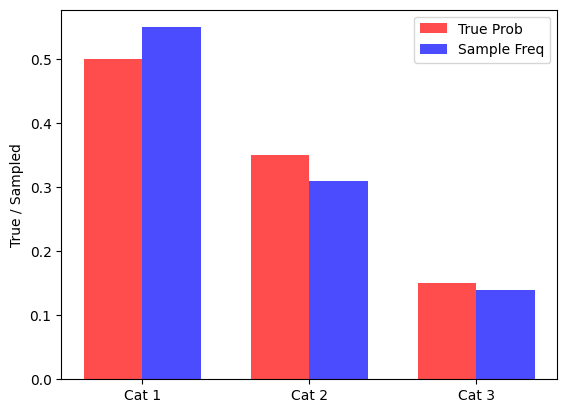

In [60]:
categories = ['Cat 1', 'Cat 2', 'Cat 3']
x = np.arange(len(categories))
width = 0.35

plt.bar(x - width/2, p, width, alpha=0.7, label='True Prob', color='red')
sample_probs = sample / sum(sample)
plt.bar(x + width/2, sample_probs, width, alpha=0.7, label='Sample Freq', color='blue')

plt.xticks(x, categories)
plt.ylabel('True / Sampled')
plt.legend()
plt.show()

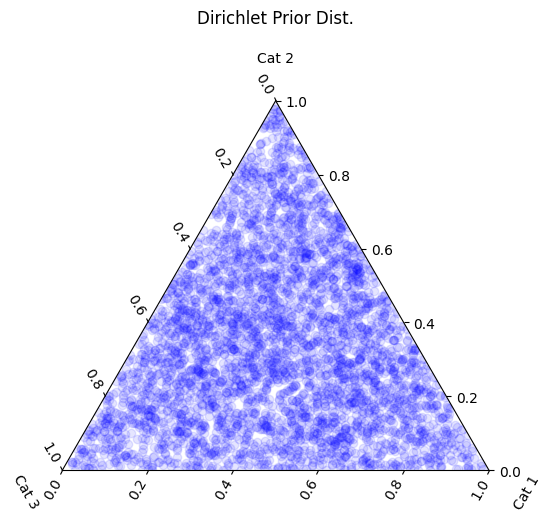

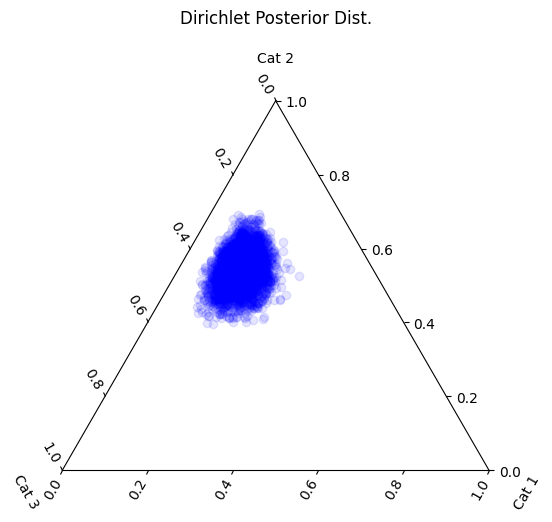

In [65]:
alpha_prior = [1.1, 1.1, 1.1]
alpha_posterior = np.array(alpha_prior) + sample

def plot_dirichlet_simplex(alpha, title):
    data = np.array(stats.dirichlet.rvs(alpha, size=4000))

    fig, ax = plt.subplots(subplot_kw={'projection': 'ternary'})
    ax.scatter(data[:, 0], data[:, 1], data[:, 2], alpha=0.1, color='blue')
    ax.set_title(title, pad=20)
    ax.set_rlabel('Cat 1')
    ax.set_tlabel('Cat 2')
    ax.set_llabel('Cat 3')
    plt.show()

plot_dirichlet_simplex(alpha_prior, title="Dirichlet Prior Dist.")
plot_dirichlet_simplex(alpha_posterior, title="Dirichlet Posterior Dist.")